Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [10]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import zipfile
zip_path = "/content/gdrive/MyDrive/CNN_assignment.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as f:
    f.extractall(extract_path)

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [29]:
# Defining the path for train and test images
# Path to the extracted directory
extracted_dir = extract_path +"/Skin cancer ISIC The International Skin Imaging Collaboration"
data_dir_train = pathlib.Path(extracted_dir)/"Train"
data_dir_test = pathlib.Path(extracted_dir)/"Test"

In [5]:
# Count the number of images in the train directory
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f"Number of training images: {image_count_train}")

# Count the number of images in the test directory
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f"Number of test images: {image_count_test}")

Number of training images: 2239
Number of test images: 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
## Write your train dataset here
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode = "categorical",
  color_mode = "rgb")

Found 2239 files belonging to 9 classes.


In [8]:
## Write your validation dataset here
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
   seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode = "categorical",
  color_mode = "rgb")

Found 118 files belonging to 9 classes.


In [9]:
for images, labels in train_ds.take(1):
    print("Train images shape:", images.shape)
    print("Train labels shape:", labels.shape)

Train images shape: (32, 180, 180, 3)
Train labels shape: (32, 9)


In [10]:
# List out all the classes of skin cancer and store them in a list.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

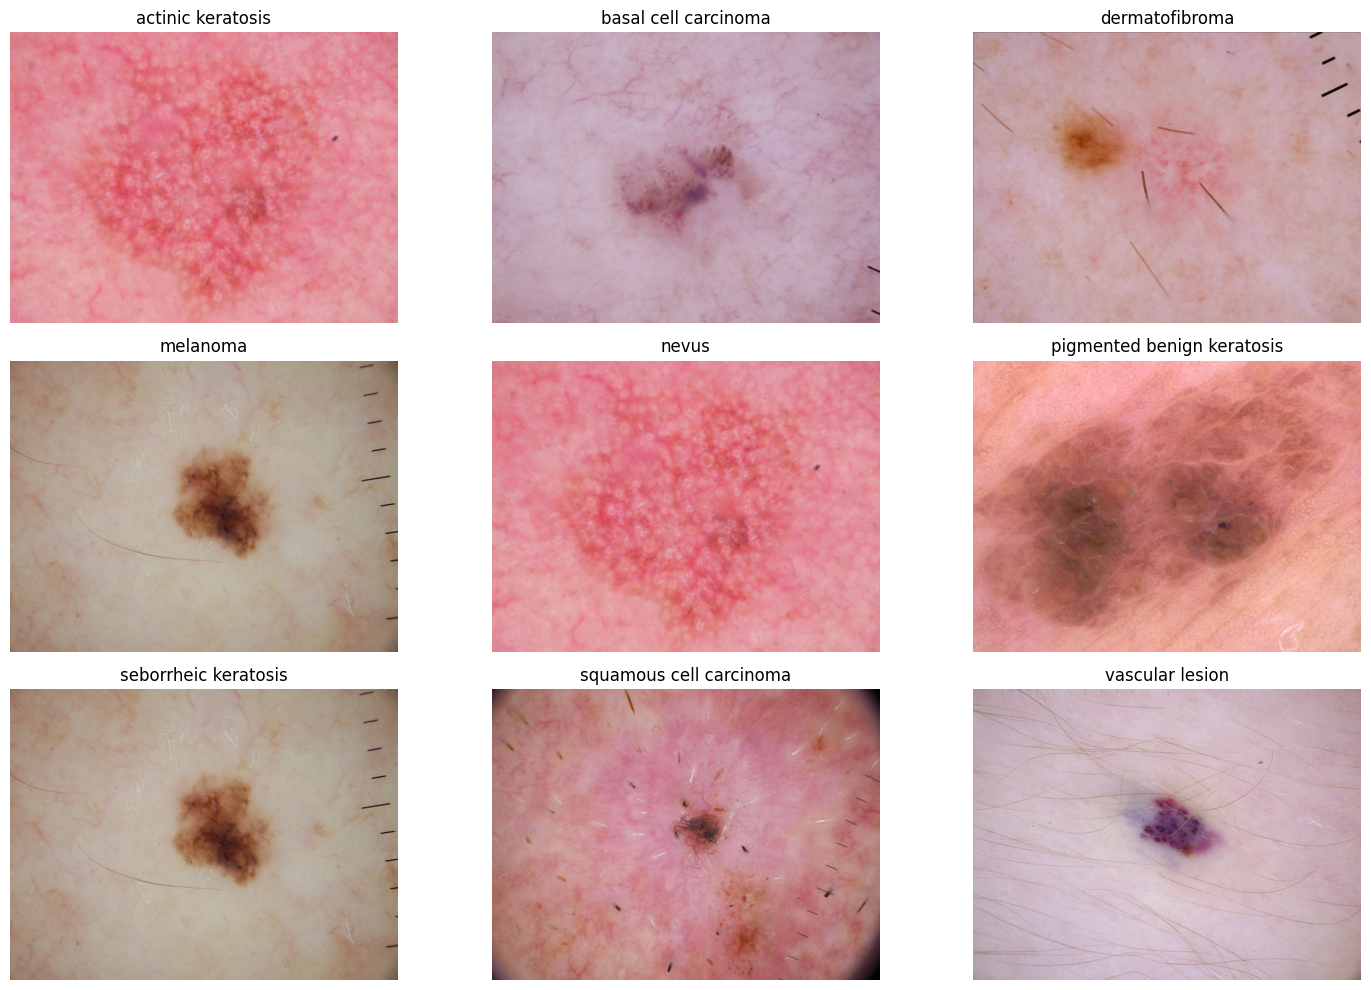

In [ ]:
# Create a figure to display the images
plt.figure(figsize=(15, 10))

# Loop through each class and display one image
for i, class_name in enumerate(class_names):
    # Get the path to the first image in the class directory
    class_dir = data_dir_train / class_name
    image_path = next(class_dir.glob("*.jpg"))  # Get the first .jpg file

    # Load the image
    img = mpimg.imread(image_path)

    # Plot the image
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns, position i+1
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")  # Hide axes

plt.tight_layout()
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
# Get input shape from dataset
input_shape  = train_ds.element_spec[0].shape[1:]

In [ ]:
### Your code goes here
# Number of epochs = 20
epochs = 20

# Pipeline of the layers
model = Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=input_shape))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,929,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [36]:
for images, labels in train_ds.take(1):
    print("Train images shape:", images.shape)
    print("Train labels shape:", labels.shape)

for images, labels in val_ds.take(1):
    print("Validation images shape:", images.shape)
    print("Validation labels shape:", labels.shape)

Train images shape: (32, 180, 180, 3)
Train labels shape: (32,)
Validation images shape: (32, 180, 180, 3)
Validation labels shape: (32,)


In [ ]:
model1 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.2161 - loss: 2.0798 - val_accuracy: 0.1695 - val_loss: 2.3827
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.3315 - loss: 1.8879 - val_accuracy: 0.2542 - val_loss: 2.3066
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4235 - loss: 1.6478 - val_accuracy: 0.1949 - val_loss: 2.8284
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4935 - loss: 1.5182 - val_accuracy: 0.3051 - val_loss: 2.2192
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5164 - loss: 1.3962 - val_accuracy: 0.3475 - val_loss: 2.1509
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5245 - loss: 1.3614 - val_accuracy: 0.3136 - val_loss: 2.1932
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5242 - loss: 1.3415 - val_accuracy: 0.3559 - val_loss: 2.5516
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5761 - loss: 1.2186 - val_accuracy: 0.3475 

### Visualizing training results

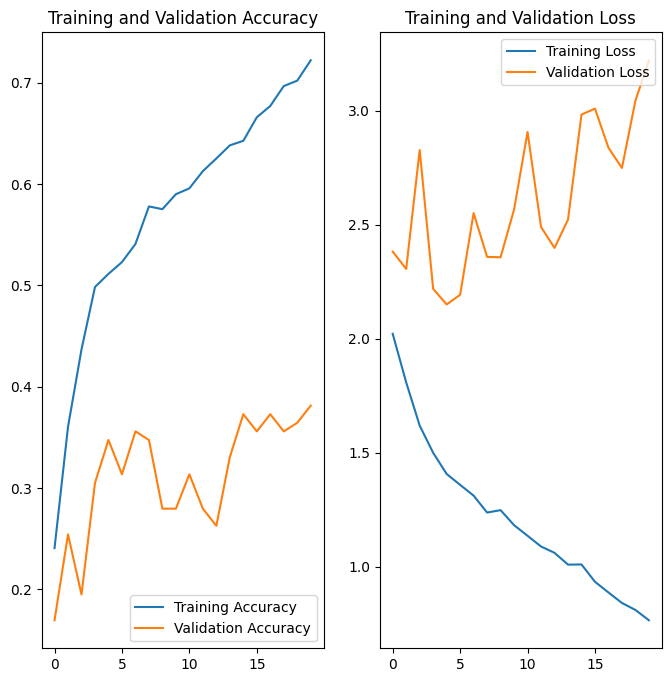

In [ ]:
acc = model1.history['accuracy']
val_acc = model1.history['val_accuracy']

loss = model1.history['loss']
val_loss = model1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Observations
1. The model's training accuracy shows a steady increase of upto 71%, while validation accuracy consistent around 35%.

2. Training accuracy suggests the model has not effectively captured the patterns in the data. However, its poor performance on validation data indicates a lack of generalizability.

3. The training loss consistently decreases over the epochs. This is expected as the model learns to better fit the training data, the errors should diminish but the validation loss exhibits a more erratic behavior. It initially decreases, then increases, and finally decreases significantly in the later epochs. This further supports the overfitting observation.

4. These observations confirm the presence of overfitting. To address this issue, augmentation techniques will be applied. Given the limited training data available, new samples will be generated by making slight modifications to existing data (such as horizontal/vertical image flipping, minor image rotations, etc.), which will then be used for training the model.

#### Augmentation Strategy

In [ ]:
# Creating an ImageDataGenerator Instance:
train_datagen = ImageDataGenerator(
    rotation_range=20,        # Randomly rotate images by 20 degrees
    width_shift_range=0.2,    # Randomly shift images horizontally by 20%
    height_shift_range=0.2,   # Randomly shift images vertically by 20%
    shear_range=0.2,          # Apply shear transformation
    zoom_range=0.2,           # Randomly zoom in/out by 20%
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in missing pixels with the nearest value
)

In [ ]:
# Apply Augmentation to training data
train_gen = train_datagen.flow_from_directory(
    data_dir_train,  # Change this to your dataset folder path
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class classification
)

Found 2239 images belonging to 9 classes.


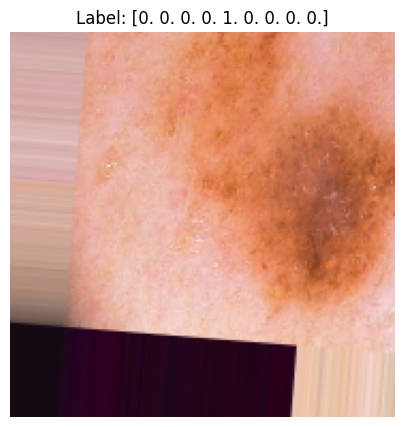

In [ ]:
# visualize how your augmentation strategy works for one instance of training image.
# Generate augmented images from the data generator
augmented_images, augmented_labels = next(train_gen)

# Select the first image from the batch and applying scaling for the image
image_to_display = augmented_images[0]/255

# Apply scaling/normalization to the selected image
#image_to_display = (image_to_display - np.min(image_to_display)) / (np.max(image_to_display) - np.min(image_to_display))

# Display a single augmented image and its label
plt.figure(figsize=(5, 5))
plt.imshow(image_to_display)  # Display the first image in the batch
plt.title(f"Label: {augmented_labels[0]}")  # Display the corresponding label
plt.axis("off")
plt.show()

In [ ]:
print(f"Number of classes: {train_gen.num_classes}")
print(f"Class labels: {train_gen.class_indices}")

Number of classes: 9
Class labels: {'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}


### Todo:
### Create the model, compile and train the model


In [ ]:
# Get input shape from dataset
input_shape  = train_ds.element_spec[0].shape[1:]
print(input_shape)

(180, 180, 3)


### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
model2 = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_ds
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 33s 475ms/step - accuracy: 0.4768 - loss: 1.6718 - val_accuracy: 0.3559 - val_loss: 2.1672
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 34s 488ms/step - accuracy: 0.5132 - loss: 1.3816 - val_accuracy: 0.3898 - val_loss: 2.3174
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 33s 474ms/step - accuracy: 0.5297 - loss: 1.3186 - val_accuracy: 0.3898 - val_loss: 2.1694
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 35s 498ms/step - accuracy: 0.5097 - loss: 1.3424 - val_accuracy: 0.3729 - val_loss: 2.6199
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 33s 474ms/step - accuracy: 0.5276 - loss: 1.3523 - val_accuracy: 0.3644 - val_loss: 2.2639
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 34s 489ms/step - accuracy: 0.5301 - loss: 1.3047 - val_accuracy: 0.3559 - val_loss: 2.4035
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 33s 470ms/step - accuracy: 0.5432 - loss: 1.2794 - val_accuracy: 0.3729 - val_loss: 2.4128
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 42s 487ms/step - accuracy: 0.5421 - loss: 1.2663 - val_accu

### Visualizing the results

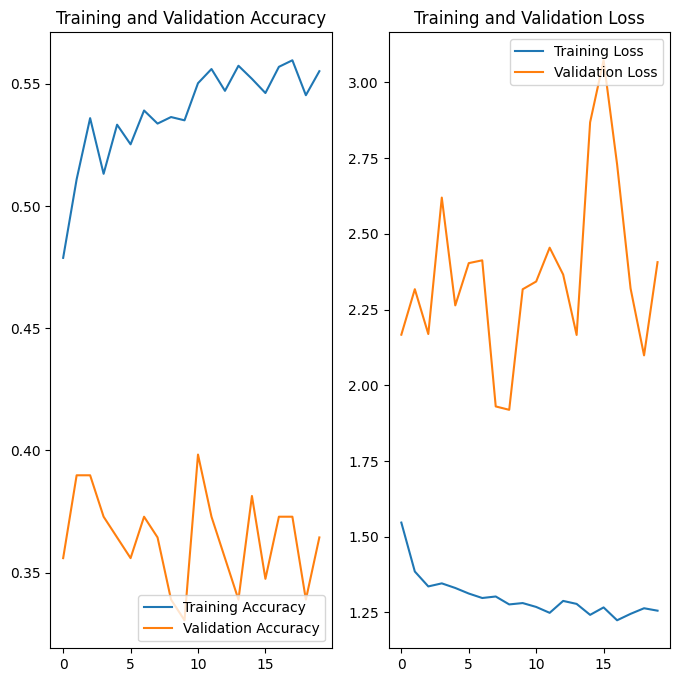

In [ ]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']

loss = model2.history['loss']
val_loss = model2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observation

1. By leveraging augmented data, overfitting addressed to a very little extent.

2. The training and validation accuracy of the aforementioned model fall within almost similar range.

3. Both the training and validation data are showing poor performance, indicating that the model is now exhibiting underfitting.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
# Get class distribution
class_indices = train_gen.class_indices  # Dictionary mapping class names to indices
class_counts = train_gen.samples         # Total number of images
class_names = list(class_indices.keys())       # List of class names

# Print class distribution
print("Class distribution:")
for class_name, index in class_indices.items():
    count = sum(train_gen.classes == index)  # Count images for each class
    print(f"{class_name}: {count} samples")


Class distribution:
actinic keratosis: 114 samples
basal cell carcinoma: 376 samples
dermatofibroma: 95 samples
melanoma: 438 samples
nevus: 357 samples
pigmented benign keratosis: 462 samples
seborrheic keratosis: 77 samples
squamous cell carcinoma: 181 samples
vascular lesion: 139 samples


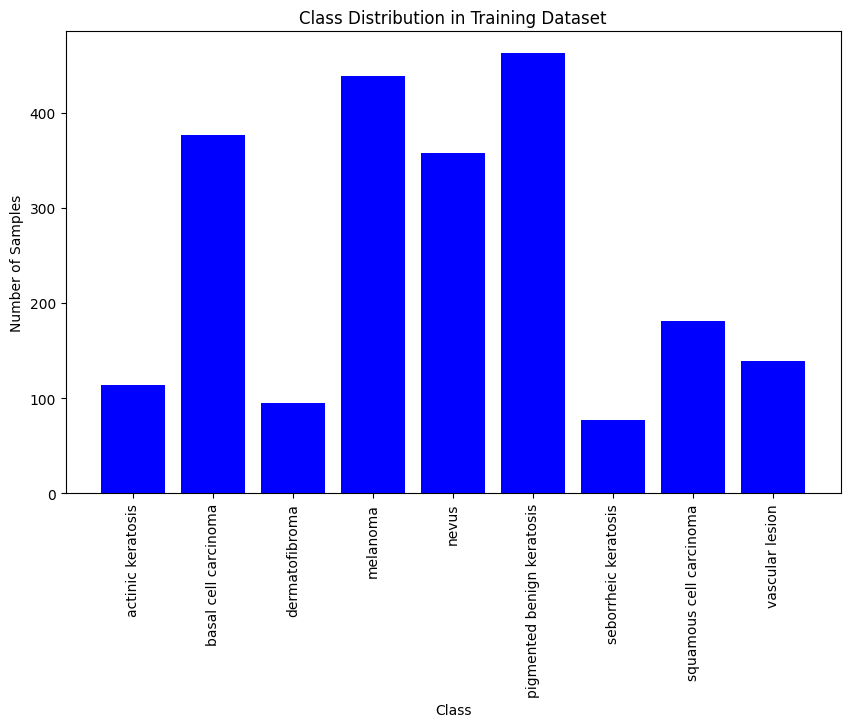

In [ ]:
# Visualize the class distribution
# Count samples for each class
class_counts = [sum(train_gen.classes == i) for i in range(train_gen.num_classes)]

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='blue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=90)
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### **seborrheic keratosis: 77 samples**
#### - Which classes dominate the data in terms proportionate number of samples?
#### **pigmented benign keratosis: 462 samples**


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [12]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [13]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset / i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1647BC7B10>: 100%|██████████| 500/500 [00:14<00:00, 35.05 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1644170390>: 100%|██████████| 500/500 [00:14<00:00, 33.74 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F164411C890>: 100%|██████████| 500/500 [00:15<00:00, 33.28 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F1646744A90>: 100%|██████████| 500/500 [01:11<00:00,  6.97 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1504x1129 at 0x7F1647A62C50>: 100%|██████████| 500/500 [01:10<00:00,  7.06 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1648A52510>: 100%|██████████| 500/500 [00:14<00:00, 34.75 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F16495C7B90>: 100%|██████████| 500/500 [00:32<00:00, 15.23 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F164877D7D0>: 100%|██████████| 500/500 [00:15<00:00, 32.59 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F16440F86D0>: 100%|██████████| 500/500 [00:17<00:00, 28.17 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [15]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [16]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

['/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027650.jpg_00c4ce04-3ea0-41c7-894b-26dc593c7859.jpg',
 '/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027452.jpg_980996dd-d14d-48c4-a697-0bccbc3ea544.jpg',
 '/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029915.jpg_819d8fbc-3560-428e-b291-86c5ccde2aeb.jpg',
 '/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025780.jpg_97817263-d71c-4677-a5cc-610bd52d749d.jpg',
 '/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029500.jpg_1f5f0e62-7ec5-49d1-afaa-04306e6f649c.jpg',
 '/co

In [17]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [18]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [21]:
original_df = pd.DataFrame(columns=['Path', 'Label']) # defining empty data frame

In [22]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)

In [24]:
new_df['Label'].value_counts()

,count
Label,
actinic keratosis,500
seborrheic keratosis,500
nevus,500
squamous cell carcinoma,500
pigmented benign keratosis,500
dermatofibroma,500
melanoma,500
vascular lesion,500
basal cell carcinoma,500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [25]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [27]:
print(extracted_dir)

/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration


In [42]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  label_mode = "categorical",
  color_mode = "rgb",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  label_mode = "categorical",
  color_mode = "rgb",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [43]:
# Pipeline of the layers
model = Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=input_shape))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization()) # Batch Norm after Conv
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization()) # Batch Norm after Conv
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Output layer
model.add(Dense(len(class_names), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [44]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 45, 45, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,929,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,025,801 (30.62 MB)

 Trainable params: 8,025,097 (30.61 MB)

 Non-trainable params: 704 (2.75 KB)

#### **Todo:**  Train your model

In [46]:
for images, labels in train_ds.take(1):
    print("Train images shape:", images.shape)
    print("Train labels shape:", labels.shape)

for images, labels in val_ds.take(1):
    print("Validation images shape:", images.shape)
    print("Validation labels shape:", labels.shape)
print(input_shape)

Train images shape: (32, 180, 180, 3)
Train labels shape: (32, 9)
Validation images shape: (32, 180, 180, 3)
Validation labels shape: (32, 9)
(180, 180, 3)


In [47]:
epochs = 30
model3 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - accuracy: 0.3225 - loss: 2.2318 - val_accuracy: 0.0898 - val_loss: 7.7842
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.4732 - loss: 1.4495 - val_accuracy: 0.1425 - val_loss: 10.1194
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 42s 145ms/step - accuracy: 0.5661 - loss: 1.1997 - val_accuracy: 0.3534 - val_loss: 2.8966
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.6361 - loss: 0.9950 - val_accuracy: 0.3563 - val_loss: 1.9465
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 38s 127ms/step - accuracy: 0.7147 - loss: 0.8111 - val_accuracy: 0.4610 - val_loss: 1.8022
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - accuracy: 0.7633 - loss: 0.6942 - val_accuracy: 0.3979 - val_loss: 2.0330
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step - accuracy: 0.7836 - loss: 0.5825 - val_accuracy: 0.1715 - val_loss: 114.6061
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 28s 166ms/step - accuracy: 0.8155 - loss

#### **Todo:**  Visualize the model results

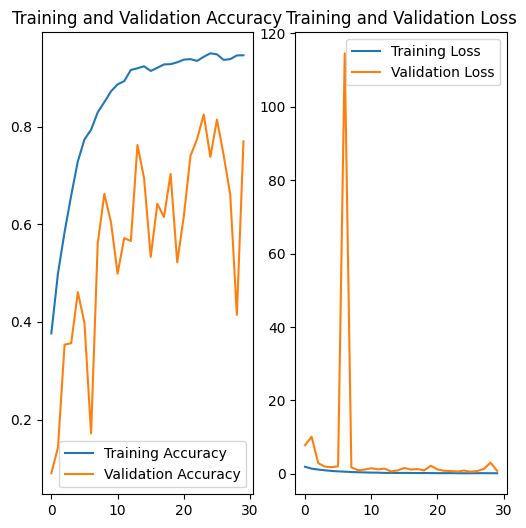

In [49]:
acc = model3.history['accuracy']
val_acc = model3.history['val_accuracy']

loss = model3.history['loss']
val_loss = model3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations
1. Initial Stages: In the first few epochs (around 0-5), both training and validation accuracy increase rapidly, which is a good sign. The training accuracy is slightly higher than the validation accuracy, which is normal.

2. Divergence: From around epoch 5 onwards, we see a significant divergence between the training and validation accuracy. The training accuracy continues to climb steadily ,while the validation accuracy plateaus and even fluctuates, showing a bumpy trend.

3. High Training Accuracy: Very high training accuracy suggests that the model is fitting the training data almost perfectly.

4. The Loss plot suggests a combination of potential overfitting

**Summary:** This clearly shows overfitting

